# Prática data science.La base de datos  contien el % de acierto de gente que se convierte. Suponemos que esa conversión se refiere a la subscripción en una pagina web una vez visitada.

-se procederá primero al analisis de datos y observacion de aguna anomalia.
-sacar resultados mediante gráficos.
-proceder a realizar el modelo predictivo.


In [15]:
import pandas as pd
import matplotlib as plt
import numpy as np
%pylab inline
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


importamos los paquetes necesarios para el tratamiento de datos y gráficos.

In [16]:
dataset = pd.read_csv('conversion.csv')


In [17]:
dataset.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [18]:
dataset.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


anomalia en la edad.Exite una entrada en la base de datos de una persona con 123 años.

In [19]:
dataset[dataset['age']>100]

,country,age,new_user,source,total_pages_visited,converted
90928,Germany,123,0,Seo,15,1
295581,UK,111,0,Ads,10,1


solo hay dos valores. Uno con 111 años y otro  con 127 se procede a eliminarlo ya que son outliers.

In [20]:
dataset = dataset[dataset['age']<100]

In [7]:
dataset.describe()

,age,new_user,total_pages_visited,converted
count,316198.000000,316198.000000,316198.000000,316198.000000
mean,30.569311,0.685469,4.872918,0.032252
std,8.268958,0.464329,3.341053,0.176669
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,79.000000,1.000000,29.000000,1.000000


observamos como ya no está. Seguimos con el análisis de los datos

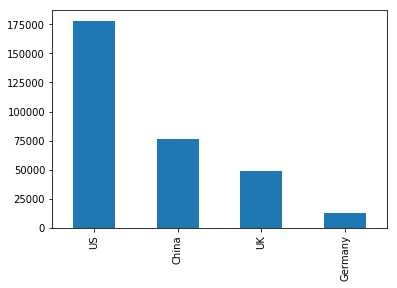

In [8]:
paises = dataset['country'].value_counts()
paises = paises.plot(kind ='bar')

Vemos una cantidad importante de personas de Estados Unidos en cambio muy pocas personas de Alemania.

In [9]:
con_conv = pd.crosstab(dataset['country'],dataset['converted'])
con_conv
#podemos ver la relacion entre paises y conversion.

converted,0,1
country,,
China,76500,102
Germany,12240,815
UK,45900,2549
US,171360,6732


In [ ]:
#vemos como la conversion de reacall es bastante malo debe ser ya que existen en las base de datos mas resultados de (NO conversion) que de (SI conversion)

In [10]:
dataseta= con_conv.div(con_conv.sum(1).astype(float),axis = 0)*100


In [11]:
pag_con = pd.crosstab(dataset['total_pages_visited'],dataset['converted'])
pag_con.head(5)
#aqui lo que vemos es la relacion entre las paginas visitadas y la conversion (subscripcion a la pagina)

converted,0,1
total_pages_visited,,
1,40739,0
2,43858,10
3,43818,11
4,41014,32
5,36251,57


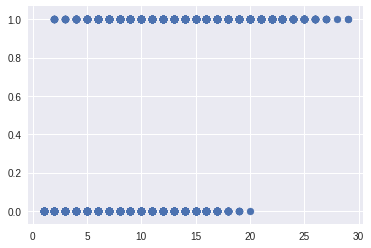

In [48]:
pag_con = plt.scatter(dataset['total_pages_visited'],dataset['converted'])

In [21]:
#vemos como la distribucion entre convertidos y no convertidos tiene mucha diferencia.Esto va a repercutir en los resusltados
dataset['converted'].value_counts()

0    306000
1     10198
Name: converted, dtype: int64

observamos como las personas se subscriben una vez que visitan 20 paginas o mas.

-A la hora de hacer le modelo vemos como hay dos variables categroicas. Pasaremos a modificarlo ya que el algorimo solo analiza valores númericos. En este caso lo que haremos sera poner un '1' para cada variable categorica

In [12]:
X = dataset.loc[:,('country','age','new_user','source','total_pages_visited')]
X

,country,age,new_user,source,total_pages_visited
0,UK,25,1,Ads,1
1,US,23,1,Seo,5
2,US,28,1,Seo,4
3,China,39,1,Seo,5
4,US,30,1,Seo,6
5,US,31,0,Seo,1
6,China,27,1,Seo,4
7,US,23,0,Ads,4
8,UK,29,0,Direct,4
9,US,25,0,Ads,2


In [13]:
X = pd.get_dummies(X)
X.head()

,age,new_user,total_pages_visited,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo
0,25,1,1,0,0,1,0,1,0,0
1,23,1,5,0,0,0,1,0,0,1
2,28,1,4,0,0,0,1,0,0,1
3,39,1,5,1,0,0,0,0,0,1
4,30,1,6,0,0,0,1,0,0,1


vemos como las variables categoricas ahora son numéricas.
Hemos quitado la variale que queremos predecir luego mas adeante guardaremos solo la variable que queremos predecir.

In [14]:
y = dataset['converted']

ahora vamos a realizar el modelo predictivo
utlizaremos la biblioteca scikitlearn.


In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [30]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size = 0.333)

ya hemos dividido la base datos en train y test ya que la parte de train sera para entrenar el modelo y el test para verificar 
la accuracy que hemos obtenido.

# Random Forest.

In [31]:
random_forest = RandomForestClassifier(n_estimators=150, min_samples_leaf=5,max_depth=3, max_features=3)
random_forest.fit(Xtrain,ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [32]:
y_predicion = random_forest.predict(Xtest)

In [33]:
socore_train = random_forest.score(Xtrain,ytrain)*100

In [34]:
socore_train

98.411125440958926

In [35]:
names = dataset.columns

In [36]:
names

Index([u'country', u'age', u'new_user', u'source', u'total_pages_visited',
       u'converted'],
      dtype='object')

In [37]:
from sklearn import metrics

In [38]:
print(metrics.classification_report(ytest,y_predicion))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99    101889
          1       0.91      0.57      0.70      3405

avg / total       0.98      0.98      0.98    105294



In [39]:
#vemos como la conversion de reacall es bastante malo debe ser ya que existen en las base de datos mas resultados de (NO conversion) que de (SI conversion)
#utilizar smote para hacer un oversample a los datos con menor distribucion
from imblearn.over_sampling import SMOTE

In [40]:
smote = SMOTE()

In [41]:
sX, sy = smote.fit_sample(X, y)

In [42]:
#repetir RF
Xtrain, Xtest, ytrain, ytest = train_test_split(sX,sy,test_size = 0.333)

In [43]:
random_forest = RandomForestClassifier(n_estimators=150, min_samples_leaf=5,max_depth=3, max_features=3)
random_forest.fit(Xtrain,ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [44]:
y_predicion1 = random_forest.predict(Xtest)

In [45]:
print(metrics.classification_report(ytest,y_predicion1))

             precision    recall  f1-score   support

          0       0.95      0.94      0.95    102045
          1       0.94      0.95      0.95    101751

avg / total       0.95      0.95      0.95    203796



In [46]:
#vemos la diferencia con la anterior al hacer un oversampling de los datos que lo necesitaban.

Conclusiones que podemos sacar respecto a la metrica de  recall.Como hemos puesto al principio suponemos que 
la conversion a la pagina puede que luego sea una suscripción y mejoras a los usiarios que se han suscrito. El recall es importante en este caso.
En los primeros  resusltados habia un '0.43% de usuarios convertidos como no convertidos. esto puede pejudicar a la empresa ya que en un futuro esos usuarios al ver que no reciben 'cariño' por parte de la empresa pueden acabaran dejandolo.
